# Multiple Linear Regression

## Import the relevant libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [22]:
data = pd.read_csv('happy.csv', index_col=0)
data.head()

,very happy,gdp/capita,cpi
country,,,
Venezuela,55,13500,79.32
Nigeria,45,2700,49.13
Iceland,42,39700,81.85
Philippines,40,4400,25.78
Netherlands,40,41500,71.60


## Explore the data

In [23]:
data.describe()

,very happy,gdp/capita,cpi
count,13.000000,13.000000,13.000000
mean,39.846154,31738.461538,67.183846
std,5.520359,16570.080389,22.097273
min,32.000000,2700.000000,25.780000
25%,37.000000,14800.000000,57.930000
50%,39.000000,39700.000000,70.160000
75%,40.000000,42000.000000,80.640000
max,55.000000,51700.000000,107.280000


In [24]:
data.corr()

,very happy,gdp/capita,cpi
very happy,1.000000,-0.547269,0.022747
gdp/capita,-0.547269,1.000000,0.630608
cpi,0.022747,0.630608,1.000000


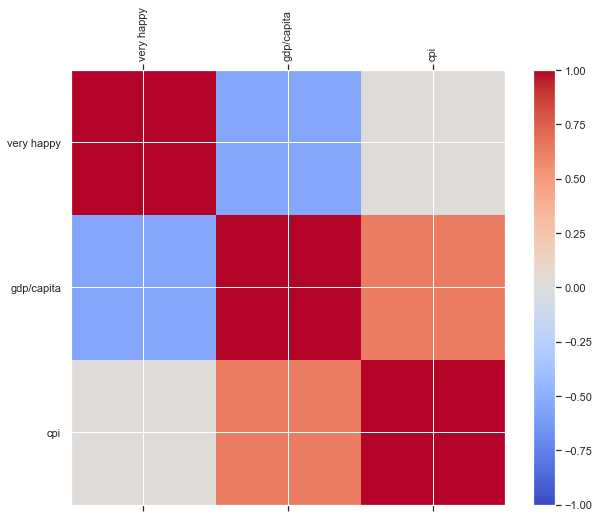

In [25]:
corr = data.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [28]:
# https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
# When there is no correlation between 2 variables (when correlation is 0 or near 0) the colour is gray. 
# The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

## Define the variables

In [12]:
x1 = data[['gdp/capita', 'cpi']]
y = data['very happy']

## Regression

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             very happy   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     5.508
Date:                Sun, 17 Jul 2022   Prob (F-statistic):             0.0244
Time:                        13:31:54   Log-Likelihood:                -35.308
No. Observations:                  13   AIC:                             76.62
Df Residuals:                      10   BIC:                             78.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4547      3.840     10.276      0.000      30.899      48.010
gdp/capita    -0.0003   9.36e-05     -3.317      0.008      -0.001      -0.000
cpi            0.1526      0.070      2.173      0.055      -0.004       0.309
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.846
Skew:                           0.912   Prob(JB):                        0.397
Kurtosis:                       2.722   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Equation

$Y = 39.4547 -0.0003X_1 + 0.1526X_2$

## Residual analysis

eval_env: 1


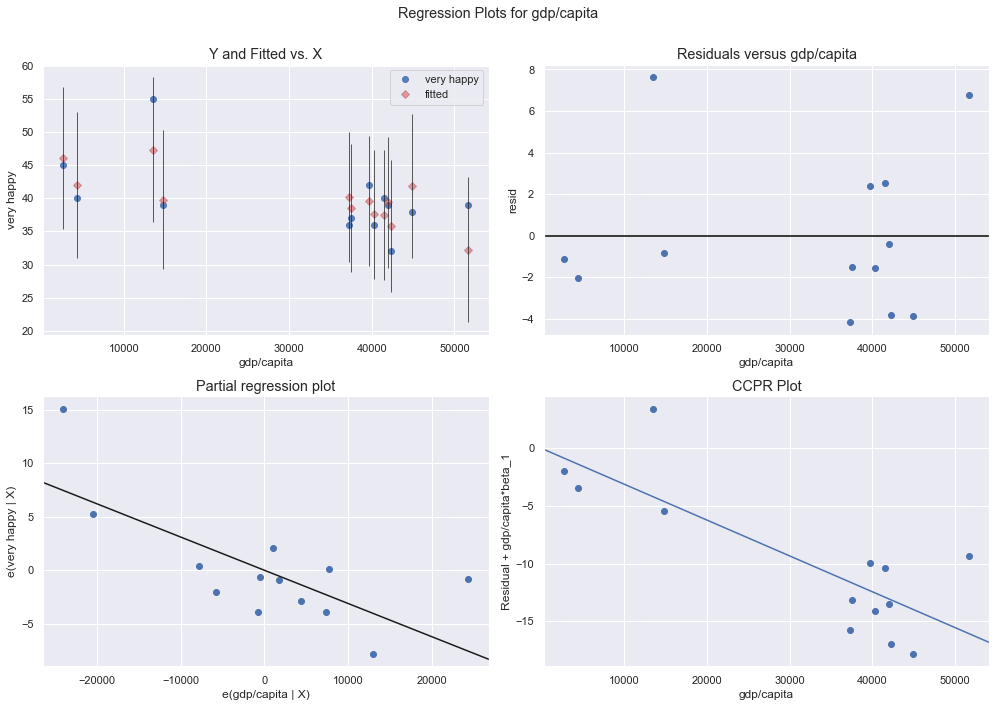

In [17]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(results, 'gdp/capita', fig=fig)

eval_env: 1


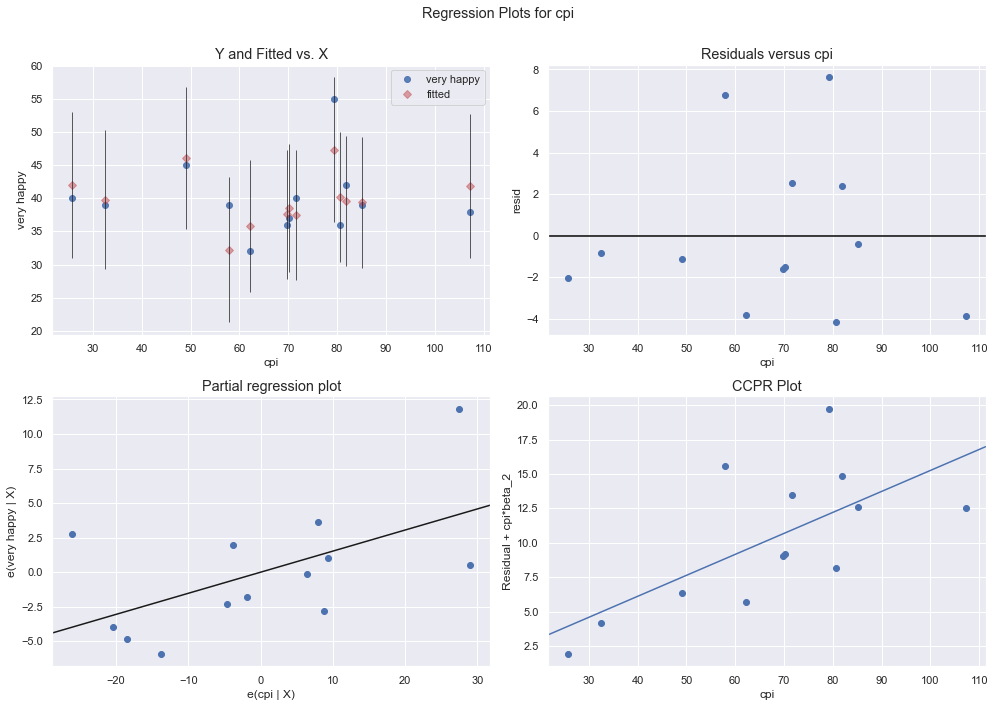

In [18]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(results, 'cpi', fig=fig)